# Stock Prediction Using Stacked LSTM

In [ ]:
import pandas as pd
tesla_df=pd.read_csv("https://raw.githubusercontent.com/p-singhal-0011/Data-Science_Sharda-University/refs/heads/main/Data-sets/Tesla.csv")
print(tesla_df)
print('\n',tesla_df.isna().sum()) # For checking any NULL values in each column

            Date        Open        High         Low       Close   Adj Close  \
0     2010-06-29   19.000000   25.000000   17.540001   23.889999   23.889999   
1     2010-06-30   25.790001   30.420000   23.299999   23.830000   23.830000   
2     2010-07-01   25.000000   25.920000   20.270000   21.959999   21.959999   
3     2010-07-02   23.000000   23.100000   18.709999   19.200001   19.200001   
4     2010-07-06   20.000000   20.000000   15.830000   16.110001   16.110001   
...          ...         ...         ...         ...         ...         ...   
2411  2020-01-28  568.489990  576.809998  558.080017  566.900024  566.900024   
2412  2020-01-29  575.690002  589.799988  567.429993  580.989990  580.989990   
2413  2020-01-30  632.419983  650.880005  618.000000  640.809998  640.809998   
2414  2020-01-31  640.000000  653.000000  632.520020  650.570007  650.570007   
2415  2020-02-03  673.690002  786.140015  673.520020  780.000000  780.000000   

        Volume  
0     18766300  
1    

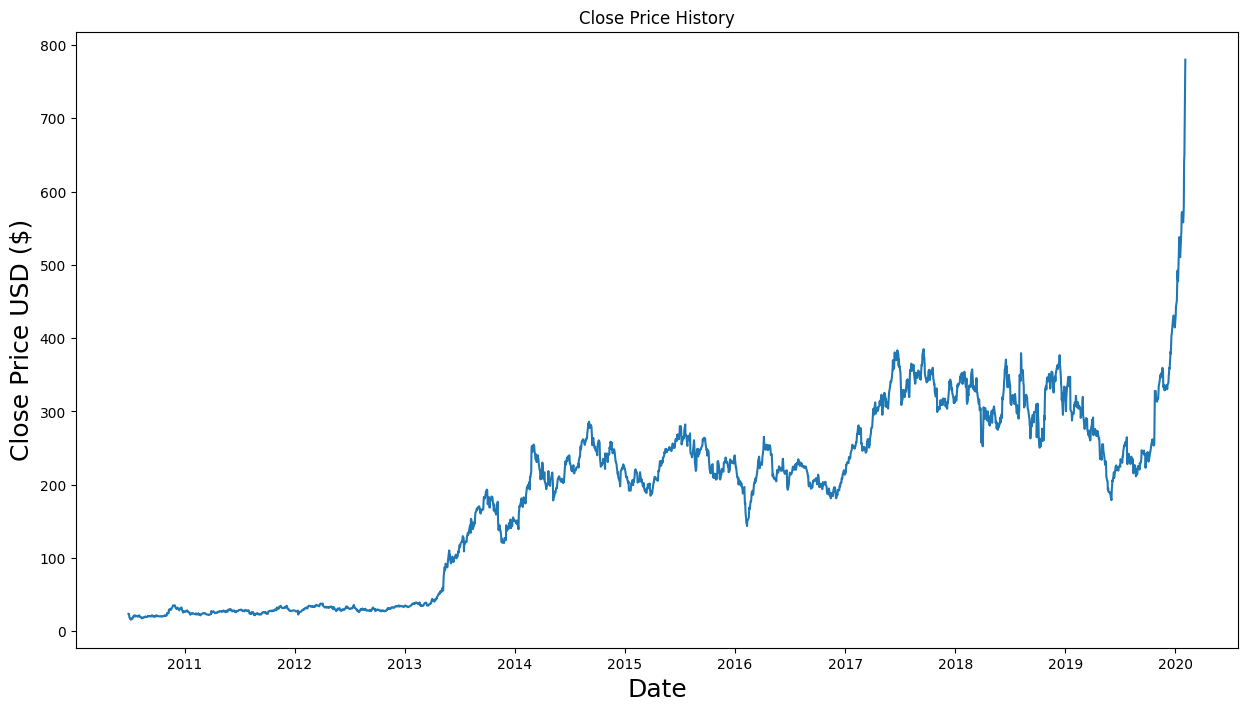

In [ ]:
tesla_df['Date']=pd.to_datetime(tesla_df['Date'])
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
plt.title('Close Price History')
plt.plot(tesla_df['Date'],tesla_df['Close'])
plt.xlabel("Date",fontsize=18)
plt.ylabel("Close Price USD ($)",fontsize=18)
plt.show()

In [ ]:
df=tesla_df.reset_index()['Close']
print(df.shape)

(2416,)


In [ ]:
# LSTM are sensitive to the scale of the data, so we are transforming the data
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df=scaler.fit_transform(np.array(df).reshape(-1,1))
print(df.shape)

# Splitting dataset into train and test split
train_size=int(len(df)*0.7)
test_size=len(df)-train_size
train_data,test_data=df[0:train_size,:],df[train_size:len(df),:1]
print(train_size,',',test_size)

(2416, 1)
1691 , 725


In [ ]:
# Convert an array of values into a dataset matrix
def create_dataset(dataset,time_step):
  x,y=[],[]
  for i in range(len(dataset)-time_step-1):
    a=dataset[i:(i+time_step),0]
    x.append(a)
    y.append(dataset[i+time_step,0])
  return np.array(x),np.array(y)

# Reshape into x=t,t+1,t+2,t+3 and y=t+4
time_step=100
x_train,y_train=create_dataset(train_data,time_step)
x_test,y_test=create_dataset(test_data,time_step)

print(x_train)
print(x_train.shape)
print(y_train.shape)

[[0.01058623 0.01050772 0.00806072 ... 0.01962837 0.0181497  0.01791416]
 [0.01050772 0.00806072 0.0044491  ... 0.0181497  0.01791416 0.01843758]
 [0.00806072 0.0044491  0.00040565 ... 0.01791416 0.01843758 0.019877  ]
 ...
 [0.2331327  0.23985868 0.24569484 ... 0.30236848 0.29979062 0.29820728]
 [0.23985868 0.24569484 0.23985868 ... 0.29979062 0.29820728 0.3014525 ]
 [0.24569484 0.23985868 0.24115414 ... 0.29820728 0.3014525  0.31693274]]
(1590, 100)
(1590,)


In [ ]:
# Reshape input to be [samples,time steps, features] which is required for LSTM
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [ ]:
# Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 50)             │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=64,verbose=1)


Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 284ms/step - loss: 7.7881e-05 - val_loss: 4.1841e-04
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 15s 447ms/step - loss: 5.7030e-05 - val_loss: 4.1584e-04
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 13s 172ms/step - loss: 4.6438e-05 - val_loss: 2.8532e-04
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 257ms/step - loss: 4.6013e-05 - val_loss: 7.8150e-04
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 170ms/step - loss: 7.1500e-05 - val_loss: 3.5086e-04
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 166ms/step - loss: 4.9651e-05 - val_loss: 4.0774e-04
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 221ms/step - loss: 4.2605e-05 - val_loss: 2.7364e-04
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 204ms/step - loss: 4.0935e-05 - val_loss: 2.9667e-04
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 205ms/step - loss: 4.2922e-05 - val_loss: 2.1668e-04
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 236ms/step - loss: 4.4544e-05 - val_loss: 2.1355e-04
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 17

In [ ]:
# Lets do the prediction and check performance metrics
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)

# Transform back to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

# Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
print(math.sqrt(mean_squared_error(y_train,train_predict)))

# Test Data RMSE
print(math.sqrt(mean_squared_error(y_test,test_predict)))

50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step
161.25909154853272
298.4030054871339


In [ ]:
# Lets do the prediction and check performance metrics
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

# Transform predictions back to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

# Inverse transform of y_train and y_test for evaluation
y_train_inv = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error, r2_score

# RMSE Performance Metrics
train_rmse = math.sqrt(mean_squared_error(y_train_inv, train_predict))
test_rmse = math.sqrt(mean_squared_error(y_test_inv, test_predict))
print("Train RMSE: {:.2f}".format(train_rmse))
print("Test RMSE: {:.2f}".format(test_rmse))

# R-squared Performance Metrics
train_r2 = r2_score(y_train_inv, train_predict)
test_r2 = r2_score(y_test_inv, test_predict)
print("R-squared for training set: {:.2f}".format(train_r2))
print("R-squared for test set: {:.2f}".format(test_r2))

# MAPE Performance Metrics
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

train_mape = mean_absolute_percentage_error(y_train_inv, train_predict)
test_mape = mean_absolute_percentage_error(y_test_inv, test_predict)
print("MAPE for training set: {:.2f}%".format(train_mape))
print("MAPE for test set: {:.2f}%".format(test_mape))


50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step
Train RMSE: 7.70
Test RMSE: 20.73
R-squared for training set: 0.99
R-squared for test set: 0.89
MAPE for training set: 4.87%
MAPE for test set: 5.26%


In [ ]:
# MAPE Performance Metrics
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Calculate MAPE for train and test sets
train_mape = mean_absolute_percentage_error(y_train_inv, train_predict)
test_mape = mean_absolute_percentage_error(y_test_inv, test_predict)

# Calculate accuracy as 100 - MAPE
train_accuracy = 100 - train_mape
test_accuracy = 100 - test_mape

# Print the results
print("Training Set Accuracy: {:.2f}%".format(train_accuracy))
print("Test Set Accuracy: {:.2f}%".format(test_accuracy))


Training Set Accuracy: 95.13%
Test Set Accuracy: 94.74%


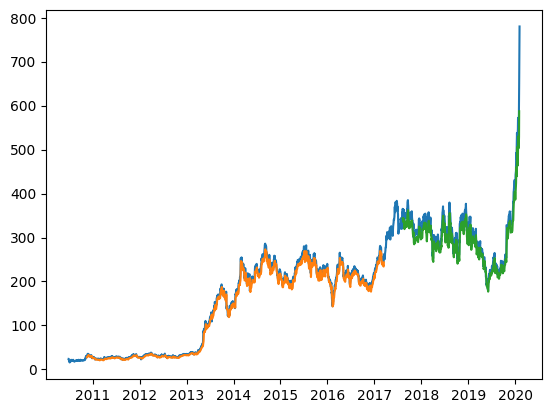

In [ ]:
# PLOTTING
# Shift train predictions for plotting
look_back=100
trainPredictPlot=np.empty_like(df)
trainPredictPlot[:, :]=np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :]=train_predict

# Shift test predictions for plotting
testPredictPlot=np.empty_like(df)
testPredictPlot[:, :]=np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df)-1, :]=test_predict

# Plot baseline and predictions
plt.plot(tesla_df['Date'],scaler.inverse_transform(df))
plt.plot(tesla_df['Date'],trainPredictPlot)
plt.plot(tesla_df['Date'],testPredictPlot)
plt.show()

# New Section

In [ ]:
print(len(test_data))
x_input=test_data[625:].reshape(1,-1)
print(x_input.shape)

input=list(x_input)
input=input[0].tolist()

# Demonstrate prediction for next 30 days
output=[]
n_steps=100
i=0
while(i<30):
  if(len(input)>100):
    x_input=np.array(input[1:])
    print("{} day input {}".format(i,x_input))
    x_input=x_input.reshape(1,-1)
    x_input=x_input.reshape(1,n_steps,1)
    yhat=model.predict(x_input,verbose=0)
    print("{} day output {}".format(i,yhat))
    input.extend(yhat[0].tolist())
    input=input[1:]
    output.extend(yhat.tolist())
    i=i+1

  else:
    x_input=x_input.reshape((1,n_steps,1))
    yhat=model.predict(x_input,verbose=0)
    print(yhat[0])
    input.extend(yhat[0].tolist())
    print(len(input))
    output.extend(yhat.tolist())
    i=i+1

print(output)

725
(1, 100)
[0.9121155]
101
1 day input [0.30105993 0.30018319 0.29705574 0.29964668 0.29794557 0.30201519
 0.29419    0.29498822 0.27140802 0.27859199 0.2967286  0.29616593
 0.29451714 0.29951584 0.29747449 0.28425805 0.28216435 0.29039519
 0.29344413 0.29930646 0.29958127 0.30370322 0.31557183 0.31678882
 0.31922272 0.32212772 0.31555877 0.31104423 0.31376603 0.31258832
 0.37147343 0.40870192 0.4081523  0.39311699 0.39153364 0.39141588
 0.38930908 0.39475268 0.39442554 0.40667363 0.41839834 0.42049204
 0.43089505 0.43722847 0.43222976 0.43646952 0.44015966 0.43730697
 0.44977753 0.44022507 0.44364039 0.41512694 0.41944517 0.40973569
 0.41283697 0.4110704  0.41752158 0.41926199 0.41511384 0.41163307
 0.41885634 0.42361947 0.43580214 0.4408532  0.44998691 0.44829889
 0.47853965 0.47525516 0.49378434 0.50803456 0.51006281 0.52789846
 0.53578906 0.54323476 0.54250197 0.52198379 0.52673382 0.54234495
 0.55902906 0.57019106 0.59311698 0.62331852 0.60918607 0.60501177
 0.6661345  0.6832242

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

print(len(df))

plt.plot(day_new,scaler.inverse_transform(df[2316:]))
plt.plot(day_pred,scaler.inverse_transform(output))
plt.xlabel("NEW DAYS")
plt.ylabel("PREDICTED")

NameError: name 'np' is not defined

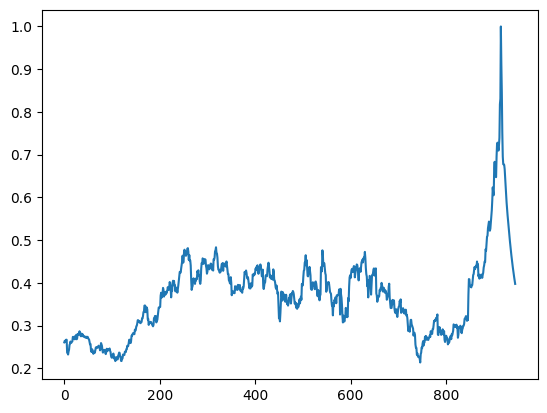

In [ ]:
df1=df.tolist()
df1.extend(output)
plt.plot(df1[1500:])

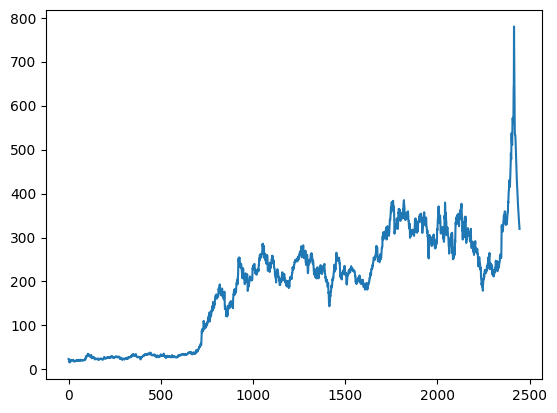

In [ ]:
df1=scaler.inverse_transform(df1).tolist()
plt.plot(df1)